<a href="https://colab.research.google.com/github/bawaslum20252026-beep/pengolahan-citra-digital/blob/main/Welcome_To_Colab.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

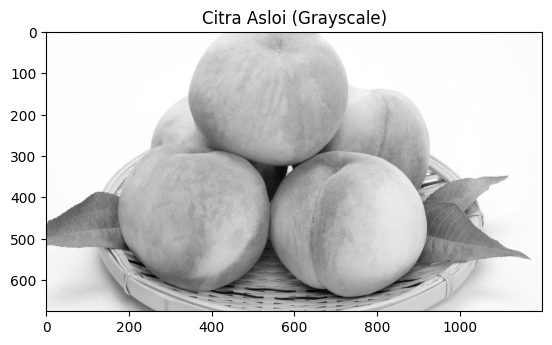

In [9]:
import cv2
import matplotlib.pyplot as plt

#Membaca gambar dalam mode grayscale
img = cv2.imread('gambar.jpg', cv2.IMREAD_GRAYSCALE)
plt.imshow(img, cmap='gray')
plt.title('Citra Asloi (Grayscale)')
plt.show()

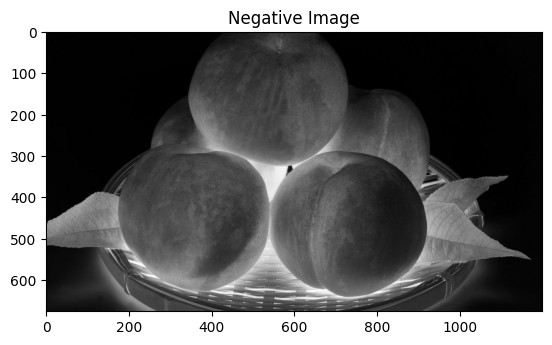

In [10]:
negative = 255 - img
plt.imshow(negative, cmap='gray')
plt.title('Negative Image')
plt.show()

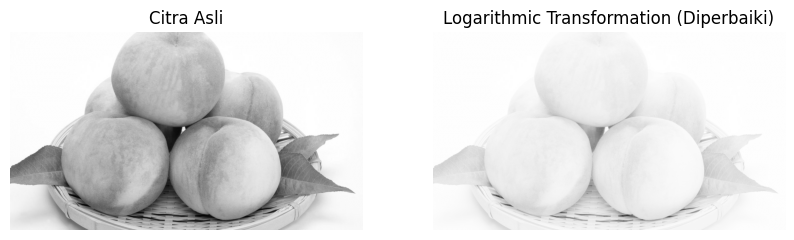

In [12]:
import numpy as np
import matplotlib.pyplot as plt
import cv2  # jika citra berasal dari OpenCV

# Pastikan img sudah berupa array numpy, misalnya:
# img = cv2.imread('gambar.jpg', 0)  # 0 artinya grayscale

# --- Transformasi Logarithmic ---
img = img.astype(np.float32)  # ubah tipe data jadi float agar log bisa dihitung

c = 255 / np.log(1 + np.max(img))
log_image = c * np.log(1 + img)

# Normalisasi hasil ke rentang 0–255 agar bisa ditampilkan dengan benar
log_image = cv2.normalize(log_image, None, 0, 255, cv2.NORM_MINMAX)
log_image = np.array(log_image, dtype=np.uint8)

# --- Tampilkan hasil ---
plt.figure(figsize=(10, 5))

plt.subplot(1, 2, 1)
plt.imshow(img, cmap='gray')
plt.title('Citra Asli')
plt.axis('off')

plt.subplot(1, 2, 2)
plt.imshow(log_image, cmap='gray')
plt.title('Logarithmic Transformation (Diperbaiki)')
plt.axis('off')

plt.show()


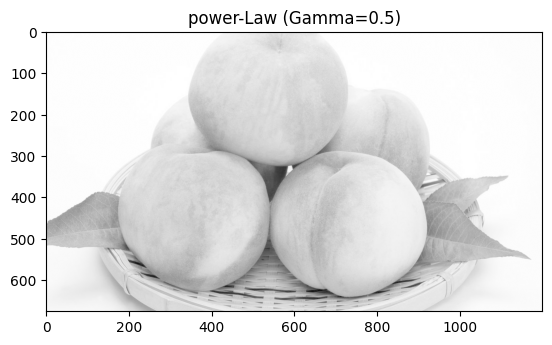

In [13]:
gamma = 0.5 # Ubah nilai gamma = 0.4, 0.6, 1.2, dst untuk eksperimen
c = 1
power_law = c * np.power(img / 255.0, gamma)
power_law = np.uint8(power_law * 255)

plt.imshow(power_law, cmap='gray')
plt.title(f'power-Law (Gamma={gamma})')
plt.show()

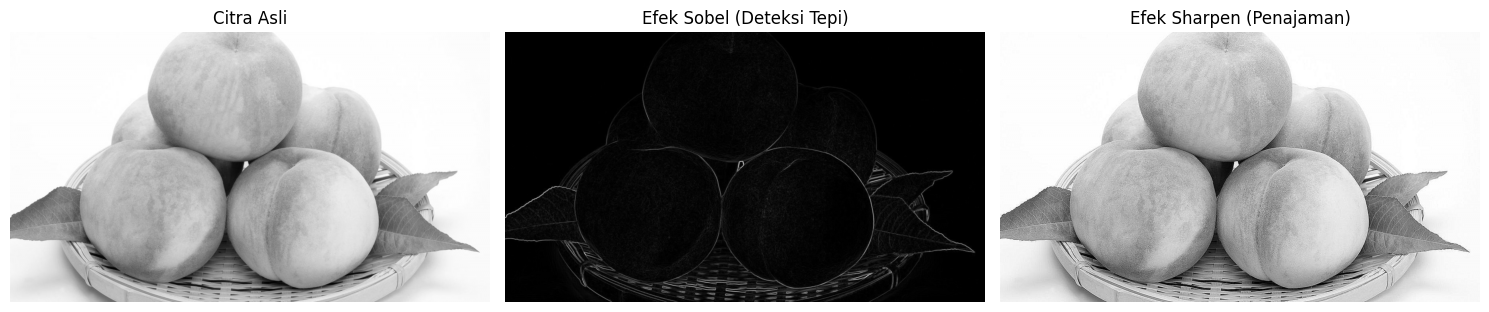

In [14]:
import numpy as np
import matplotlib.pyplot as plt
import cv2

# --- BACA CITRA (pastikan path sesuai atau gunakan gambar dari variabel 'img') ---
# Jika kamu sudah punya variabel img, baris ini bisa dilewati
# img = cv2.imread('gambar.jpg', 0)  # 0 artinya grayscale

# Pastikan citra dalam bentuk float untuk perhitungan Sobel
img = img.astype(np.float32)

# --- Efek SOBEL (Deteksi Tepi) ---
sobelx = cv2.Sobel(img, cv2.CV_64F, 1, 0, ksize=3)
sobely = cv2.Sobel(img, cv2.CV_64F, 0, 1, ksize=3)
sobel = np.sqrt(sobelx**2 + sobely**2)
sobel = cv2.normalize(sobel, None, 0, 255, cv2.NORM_MINMAX)
sobel = np.uint8(sobel)

# --- Efek SHARPEN (Penajaman) ---
sharpen_kernel = np.array([[0, -1, 0],
                           [-1, 5, -1],
                           [0, -1, 0]])
sharpen = cv2.filter2D(np.uint8(img), -1, sharpen_kernel)

# --- TAMPILKAN SEMUA HASIL ---
plt.figure(figsize=(15, 5))

plt.subplot(1, 3, 1)
plt.imshow(img, cmap='gray')
plt.title('Citra Asli')
plt.axis('off')

plt.subplot(1, 3, 2)
plt.imshow(sobel, cmap='gray')
plt.title('Efek Sobel (Deteksi Tepi)')
plt.axis('off')

plt.subplot(1, 3, 3)
plt.imshow(sharpen, cmap='gray')
plt.title('Efek Sharpen (Penajaman)')
plt.axis('off')

plt.tight_layout()
plt.show()
